<a href="https://colab.research.google.com/github/Shreya-data/Bank-Churners/blob/main/Decision_Tree_and_Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing the libraries
import numpy as np                  
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from xgboost import XGBClassifier

from sklearn.model_selection import GridSearchCV

import seaborn as sns
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings('ignore')

In [ ]:
#to display more columns and more rows
pd.set_option("display.max_rows",1000)    
pd.set_option("display.max_columns",1000)

In [ ]:
#Mount the Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#load the dataset
dataset=pd.read_csv("/content/drive/MyDrive/BankChurners.csv")
dataset.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [ ]:
#shape of dataset
print("shape of dataset is :", dataset.shape)

shape of dataset is : (10127, 23)


In [ ]:
#information about non-null count and dtype of each column 
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

In [ ]:
#list of column names
dataset.columns.values

array(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype=object)

In [ ]:
# drop column which has no significance in the dataset
dataset.drop(columns=['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2','CLIENTNUM'],inplace=True)

In [ ]:
#dataset after drop the columns
dataset.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [ ]:
#check the count of null values in each columns
dataset.isnull().sum()

Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [ ]:
#descriptive statistics of numerical features
dataset.describe()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


In [ ]:
#descriptive statistics of categorical features
dataset.describe(include="object")

,Attrition_Flag,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
count,10127,10127,10127,10127,10127,10127
unique,2,2,7,4,6,4
top,Existing Customer,F,Graduate,Married,Less than $40K,Blue
freq,8500,5358,3128,4687,3561,9436


In [ ]:
#get the categorical features name
cat_col=dataset.describe(include="object").columns.values
cat_col

array(['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category'], dtype=object)

In [ ]:
a=[]    #make a empty list
for i in cat_col:
    b=pd.Series(dataset[i].value_counts())
    a.append(b)   #append value counts of each categorical features 

In [ ]:
#This is the DataFrame where each value in dataset is column name and each feature is index
pd.DataFrame(a)

,Existing Customer,Attrited Customer,F,M,Graduate,High School,Unknown,Uneducated,College,Post-Graduate,Doctorate,Married,Single,Divorced,Less than $40K,$40K - $60K,$80K - $120K,$60K - $80K,$120K +,Blue,Silver,Gold,Platinum
Attrition_Flag,8500.0,1627.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,NaN,NaN,5358.0,4769.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Education_Level,NaN,NaN,NaN,NaN,3128.0,2013.0,1519.0,1487.0,1013.0,516.0,451.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Marital_Status,NaN,NaN,NaN,NaN,NaN,NaN,749.0,NaN,NaN,NaN,NaN,4687.0,3943.0,748.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Income_Category,NaN,NaN,NaN,NaN,NaN,NaN,1112.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3561.0,1790.0,1535.0,1402.0,727.0,NaN,NaN,NaN,NaN
Card_Category,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9436.0,555.0,116.0,20.0


In [ ]:
#to drop the missing value that is, "Unknown" 
data=dataset.replace({"Unknown":np.nan})
data.dropna(inplace=True)

In [ ]:
#cross check the total count of null values throughout the dataset
data.isnull().sum().sum()

0

In [ ]:
#same procedure
a=[]
for i in cat_col:
    b=pd.Series(dataset[i].value_counts())
    a.append(b)

In [ ]:
#once again,call the categorical column name
cat_col

array(['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category'], dtype=object)

In [ ]:
#all values present in dataset
pd.DataFrame(a).columns.values

array(['Existing Customer', 'Attrited Customer', 'F', 'M', 'Graduate',
       'High School', 'Unknown', 'Uneducated', 'College', 'Post-Graduate',
       'Doctorate', 'Married', 'Single', 'Divorced', 'Less than $40K',
       '$40K - $60K', '$80K - $120K', '$60K - $80K', '$120K +', 'Blue',
       'Silver', 'Gold', 'Platinum'], dtype=object)

In [ ]:
#numerical encoding
encoders_nums = {'Attrition_Flag':{'Existing Customer':0,'Attrited Customer':1},
                 'Gender':{"M":1,"F":0},
                  'Education_Level':{'Graduate': 3,'High School': 1, 'Uneducated':0, 'College':2, 'Post-Graduate':4,
       'Doctorate':5},
                'Marital_Status':{'Married':1,'Single':0,"Divorced":2},
                 'Income_Category':{'Less than $40K': 0, '$40K - $60K': 1, '$80K - $120K': 3, '$60K - $80K': 2,
                                  '$120K +': 4},
                  'Card_Category':{'Silver':1,'Blue':0,'Gold':2,'Platinum':3}
                 }

In [ ]:
#take a copy of dataset and manipulation would do on this copy dataset
df=data.copy()

In [ ]:
#change categorical values into numerical values
df.replace(encoders_nums,inplace=True)
df.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,0,45,1,3,1,1,2,0,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,0,49,0,5,3,0,0,0,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,0,51,1,3,3,1,3,0,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
4,0,40,1,3,0,1,2,0,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
5,0,44,1,2,3,1,1,0,36,3,1,2,4010.0,1247,2763.0,1.376,1088,24,0.846,0.311


In [ ]:
#importing smote to overcome the problem for unbalance classes.
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore')

smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(df.iloc[:,1:], df['Attrition_Flag'])

print('Original shape of Dataset', len(df))
print('Resampled shape of Dataset', len(y_smote))


Original shape of Dataset 7081
Resampled shape of Dataset 11936


In [ ]:
#independent columns
columns=df.iloc[:,1:].columns.values

In [ ]:
#blanced dataset
balance_df = pd.DataFrame(x_smote, columns=columns)
balance_df['Attrition_Flag'] = y_smote


In [ ]:
balance_df

,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Attrition_Flag
0,45,1,3,1,1,2,0,39,5,1,3,12691.000000,777,11914.000000,1.335000,1144,42,1.625000,0.061000,0
1,49,0,5,3,0,0,0,44,6,1,2,8256.000000,864,7392.000000,1.541000,1291,33,3.714000,0.105000,0
2,51,1,3,3,1,3,0,36,4,1,0,3418.000000,0,3418.000000,2.594000,1887,20,2.333000,0.000000,0
3,40,1,3,0,1,2,0,21,5,1,0,4716.000000,0,4716.000000,2.175000,816,28,2.500000,0.000000,0
4,44,1,2,3,1,1,0,36,3,1,2,4010.000000,1247,2763.000000,1.376000,1088,24,0.846000,0.311000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11931,38,1,2,1,0,0,0,29,2,2,3,9534.162514,258,9275.549200,0.886661,8456,82,0.924153,0.025648,1
11932,47,1,4,1,1,1,0,37,2,3,1,7950.273010,87,7862.971865,0.636848,1997,44,0.509425,0.011121,1
11933,47,0,2,3,0,0,0,39,3,2,3,2199.379623,1386,813.152025,0.683253,2543,40,0.387563,0.629202,1
11934,46,1,3,1,1,3,0,32,2,2,3,2340.848534,0,2340.848534,0.842788,723,18,0.545477,0.000000,1


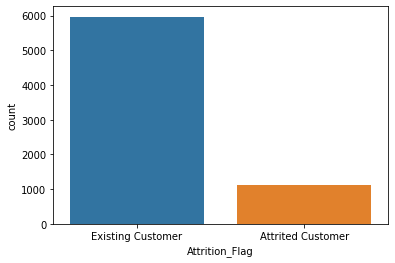

In [ ]:
#before apply smote
sns.countplot('Attrition_Flag', data = data)


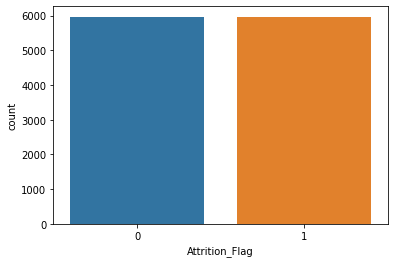

In [ ]:
#after apply smote
sns.countplot('Attrition_Flag', data = balance_df)


In [ ]:
#dataset when consumers are lost by bank.
balance_df[balance_df['Attrition_Flag']==1]

,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Attrition_Flag
12,62,0,0,3,1,0,0,49,2,3,3,1438.300000,0,1438.300000,1.047000,692,16,0.600000,0.000000,1
31,54,0,1,3,1,0,0,40,2,3,1,1438.300000,808,630.300000,0.997000,705,19,0.900000,0.562000,1
33,56,1,2,3,1,4,0,36,1,3,3,15769.000000,0,15769.000000,1.041000,602,15,0.364000,0.000000,1
37,48,1,2,3,1,2,1,35,2,4,4,34516.000000,0,34516.000000,0.763000,691,15,0.500000,0.000000,1
89,53,1,2,3,1,3,0,41,3,3,2,11669.000000,2227,9442.000000,0.622000,720,23,0.353000,0.191000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11931,38,1,2,1,0,0,0,29,2,2,3,9534.162514,258,9275.549200,0.886661,8456,82,0.924153,0.025648,1
11932,47,1,4,1,1,1,0,37,2,3,1,7950.273010,87,7862.971865,0.636848,1997,44,0.509425,0.011121,1
11933,47,0,2,3,0,0,0,39,3,2,3,2199.379623,1386,813.152025,0.683253,2543,40,0.387563,0.629202,1
11934,46,1,3,1,1,3,0,32,2,2,3,2340.848534,0,2340.848534,0.842788,723,18,0.545477,0.000000,1


In [ ]:
#define dependent and independent variable
y=balance_df["Attrition_Flag"]  #dependent variable
X=balance_df.iloc[:,:-1]         #independent variable

In [ ]:
#split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=324,stratify = y)

In [ ]:
#hyperParameter
param_grid = {'penalty':['l1','l2'], 'C' : [0.001, 0.01, 0.1, 1, 10, 100, 1000] }

In [ ]:
#crossvalidation
grid_lr_clf = GridSearchCV(LogisticRegression(), param_grid, scoring = 'accuracy', n_jobs = -1, verbose = 3, cv = 3)
grid_lr_clf.fit(X_train, y_train)

Fitting 3 folds for each of 14 candidates, totalling 42 fits


GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2']},
             scoring='accuracy', verbose=3)

In [ ]:
#best estimator through all the cross validation
optimized_clf = grid_lr_clf.best_estimator_

In [ ]:
#best Parameter through all the cross validation
grid_lr_clf.best_params_

{'C': 0.1, 'penalty': 'l2'}

In [ ]:
#best score
grid_lr_clf.best_score_

0.8073921410615622

In [ ]:
# Predicted Probability
train_preds = optimized_clf.predict_proba(X_train)[:,1]
test_preds = optimized_clf.predict_proba(X_test)[:,1]

In [ ]:
# Get the predicted classes
train_class_preds = optimized_clf.predict(X_train)
test_class_preds = optimized_clf.predict(X_test)

In [ ]:
# Get the accuracy scores
train_accuracy_lr = accuracy_score(train_class_preds,y_train)
test_accuracy_lr = accuracy_score(test_class_preds,y_test)
print("The accuracy on train data is ", train_accuracy_lr)
print("The accuracy on test data is ", test_accuracy_lr)


The accuracy on train data is  0.7859237536656891
The accuracy on test data is  0.7780569514237856


In [ ]:
#evaluation metrics
test_accuracy_lr = accuracy_score(test_class_preds,y_test)
test_precision_score_lr = precision_score(test_class_preds,y_test)
test_recall_score_lr = recall_score(test_class_preds,y_test)
test_f1_score_lr = f1_score(test_class_preds,y_test)
test_roc_score_lr = roc_auc_score(test_class_preds,y_test)

print("The accuracy on test data is ", test_accuracy_lr)
print("The precision on test data is ", test_precision_score_lr)
print("The recall on test data is ", test_recall_score_lr)
print("The f1 on test data is ", test_f1_score_lr)
print("The roc_score on test data is ", test_roc_score_lr)

The accuracy on test data is  0.7780569514237856
The precision on test data is  0.7763819095477387
The recall on test data is  0.7789915966386555
The f1 on test data is  0.7776845637583893
The roc_score on test data is  0.7780600721089772


[[3750 1024]
 [1020 3754]]


[Text(0, 0.5, 'Not Defaulter'), Text(0, 1.5, 'Defaulter')]

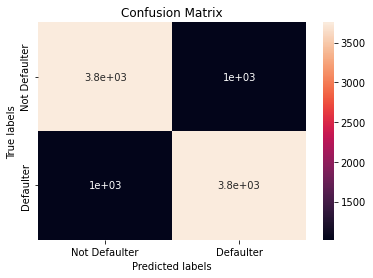

In [ ]:
# Get the confusion matrix for both train and test

labels = ['Not Defaulter', 'Defaulter']
cm = confusion_matrix(y_train, train_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)


In [ ]:
feature_importance = pd.DataFrame({'Features':columns, 'Importance':np.abs(optimized_clf.coef_).ravel() })

In [ ]:
feature_importance = feature_importance.sort_values(by = 'Importance', ascending=False)[:10]

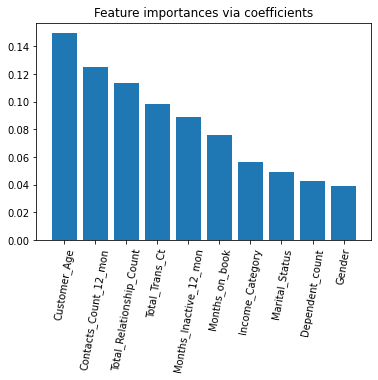

In [ ]:
plt.bar(height=feature_importance['Importance'], x= feature_importance['Features'])
plt.xticks(rotation=80)
plt.title("Feature importances via coefficients")
plt.show()



In [ ]:
y_preds_proba_lr = optimized_clf.predict_proba(X_test)[::,1]
y_pred_proba = y_preds_proba_lr

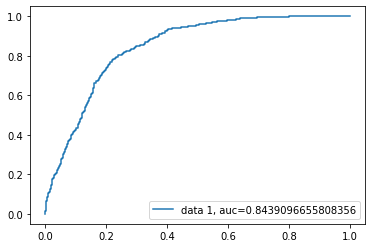

In [ ]:

fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

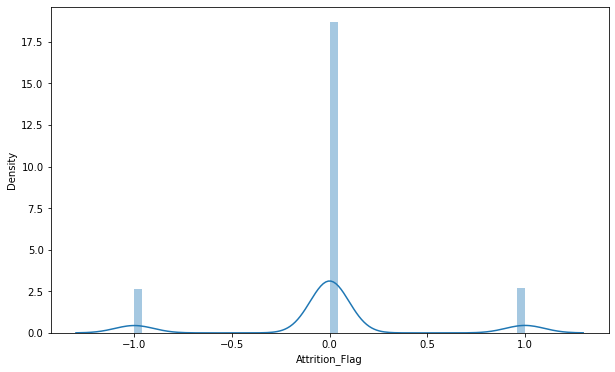

In [ ]:
# logistic regression Error plot
errors_CV_lr = y_test - test_class_preds

plt.figure(figsize = (10,6))
sns.distplot(errors_CV_lr)
plt.show()

Decision Tree

In [ ]:
#Decision Tree
attrition_classifier = DecisionTreeClassifier(criterion='gini', max_leaf_nodes=10, random_state=0)
attrition_classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_leaf_nodes=10, random_state=0)

In [ ]:
#predict the dependent variable
y_predicted = attrition_classifier.predict(X_test)

#calculate accuaracy
accuracy_score(y_test, y_predicted) * 100

In [ ]:
#import libraries for the display of decision tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

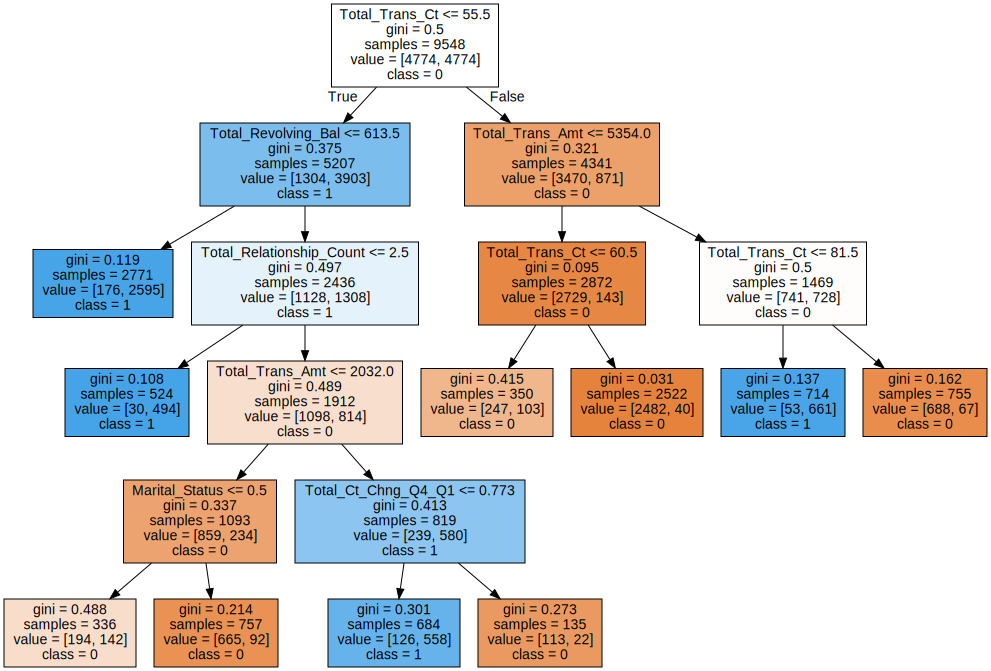

In [ ]:
#display of decision tree
graph = Source(tree.export_graphviz(attrition_classifier, out_file=None
   , feature_names=X_train.columns, class_names=['0', '1'] 
   , filled = True))
display(SVG(graph.pipe(format='svg')))

In [ ]:
#evaluation metrics
test_accuracy_d = accuracy_score(y_predicted,y_test)
test_precision_score_d = precision_score(y_predicted,y_test)
test_recall_score_d = recall_score(y_predicted,y_test)
test_f1_score_d = f1_score(y_predicted,y_test)
test_roc_score_d = roc_auc_score(y_predicted,y_test)

print("The accuracy on test data is ", test_accuracy_d)
print("The precision on test data is ", test_precision_score_d)
print("The recall on test data is ", test_recall_score_d)
print("The f1 on test data is ", test_f1_score_d)
print("The roc_score on test data is ", test_roc_score_d)

The accuracy on test data is  0.9020100502512562
The precision on test data is  0.8852596314907872
The recall on test data is  0.915944540727903
The f1 on test data is  0.9003407155025553
The roc_score on test data is  0.9024617355179223


In [ ]:
y_preds_proba_d = attrition_classifier.predict_proba(X_test)[::,1]
y_pred_proba = y_preds_proba_d

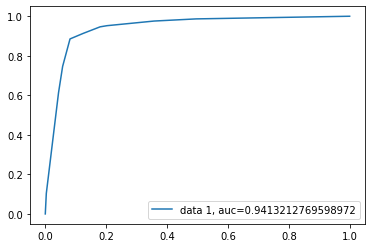

In [ ]:
#roc-auc 
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

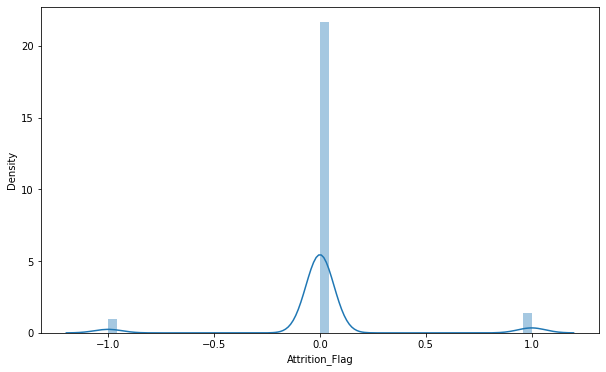

In [ ]:
# Decision tree Error plot
errors_d = y_test - y_predicted

plt.figure(figsize = (10,6))
sns.distplot(errors_d)
plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

#Setup arrays to store training and test accuracies
neighbors = np.arange(1,9)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    # Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Fit the model
    knn.fit(X_train, y_train)
    
    # Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    
    # Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test)

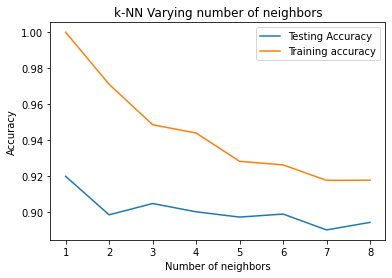

In [ ]:
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
# Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(n_neighbors=3)

In [ ]:
# Fit the model
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
knn.score(X_test,y_test)

0.9049413735343383

In [ ]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

In [ ]:
# In case of classifier like knn the parameter to be tuned is n_neighbors
param_grid = {'n_neighbors':np.arange(1,50)}

In [ ]:
#cross validation
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [ ]:
#best score
knn_cv.best_score_

0.9084630806403396

In [ ]:
#best Parameter
knn_cv.best_params_

{'n_neighbors': 1}

In [ ]:
# Get the predicted classes
train_class_preds_knn = knn_cv.predict(X_train)
test_class_preds_knn = knn_cv.predict(X_test)

In [ ]:
#Get the accuracy scores
train_accuracy_knn = accuracy_score(train_class_preds_knn,y_train)
test_accuracy_knn = accuracy_score(test_class_preds_knn,y_test)

print("The accuracy on train data is ", train_accuracy_knn)
print("The accuracy on test data is ", test_accuracy_knn)

The accuracy on train data is  1.0
The accuracy on test data is  0.9200167504187605


In [ ]:
#evaluation metrics
test_accuracy_knn = accuracy_score(test_class_preds_knn,y_test)
test_precision_score_knn = precision_score(test_class_preds_knn,y_test)
test_recall_score_knn = recall_score(test_class_preds_knn,y_test)
test_f1_score_knn = f1_score(test_class_preds_knn,y_test)
test_roc_score_knn = roc_auc_score(test_class_preds_knn,y_test)

print("The accuracy on test data is ", test_accuracy_knn)
print("The precision on test data is ", test_precision_score_knn)
print("The recall on test data is ", test_recall_score_knn)
print("The f1 on test data is ", test_f1_score_knn)
print("The roc_score on test data is ", test_roc_score_knn)

The accuracy on test data is  0.9200167504187605
The precision on test data is  0.9505862646566164
The recall on test data is  0.8958168902920284
The f1 on test data is  0.922389272653393
The roc_score on test data is  0.9215926556723301


In [ ]:
# Get the confusion matrix for both train and test

labels = ['Attrited Customer', 'Existing Customer']
cm = confusion_matrix(y_test, test_accuracy_knn)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)



TypeError: ignored

In [ ]:
# Get the predicted classes
y_preds_proba_knn = knn_cv.predict_proba(X_test)[::,1]
y_pred_proba = y_preds_proba_knn

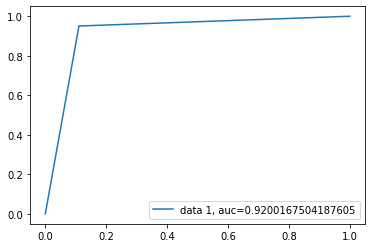

In [ ]:
#roc-auc
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

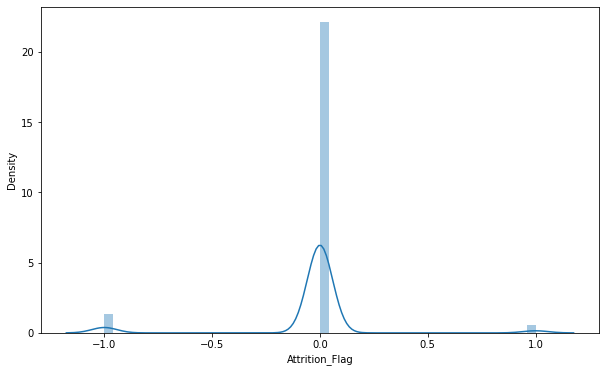

In [ ]:
# Linear Regression Error plot
errors_knn = y_test - test_class_preds_knn

plt.figure(figsize = (10,6))
sns.distplot(errors_knn)
plt.show()

# ** Gradient Boosting Classifier**


In [ ]:
#HyperParameter
param_grid = {'n_estimators': [100,150,200], 'max_depth': [10,20,30]}

In [ ]:
#crossvalidation
grid_rf_clf = GridSearchCV(RandomForestClassifier(), param_grid, scoring = 'accuracy', n_jobs = -1, verbose = 3, cv = 3)
grid_rf_clf.fit(X_train, y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30],
                         'n_estimators': [100, 150, 200]},
             scoring='accuracy', verbose=3)

In [ ]:
best score
grid_rf_clf.best_score_

0.9728739106684442

In [ ]:
#best parameter
grid_rf_clf.best_params_

{'max_depth': 30, 'n_estimators': 150}

In [ ]:
#best estimator
optimal_rf_clf = grid_rf_clf.best_estimator_

In [ ]:
# Get the predicted classes
train_class_preds123 = optimal_rf_clf.predict(X_train)
test_class_preds123= optimal_rf_clf.predict(X_test)

In [ ]:
#Get the accuracy scores
train_accuracy_rf = accuracy_score(train_class_preds,y_train)
test_accuracy_rf = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy_rf)
print("The accuracy on test data is ", test_accuracy_rf)

The accuracy on train data is  0.7859237536656891
The accuracy on test data is  0.7780569514237856


In [ ]:
#evalation metrics
test_accuracy_rf = accuracy_score(test_class_preds,y_test)
test_precision_score_rf = precision_score(test_class_preds,y_test)
test_recall_score_rf = recall_score(test_class_preds,y_test)
test_f1_score_rf = f1_score(test_class_preds,y_test)
test_roc_score_rf = roc_auc_score(test_class_preds,y_test)

print("The accuracy on test data is ", test_accuracy_rf)
print("The precision on test data is ", test_precision_score_rf)
print("The recall on test data is ", test_recall_score_rf)
print("The f1 on test data is ", test_f1_score_rf)
print("The roc_score on test data is ", test_roc_score_rf)

The accuracy on test data is  0.7780569514237856
The precision on test data is  0.7763819095477387
The recall on test data is  0.7789915966386555
The f1 on test data is  0.7776845637583893
The roc_score on test data is  0.7780600721089772


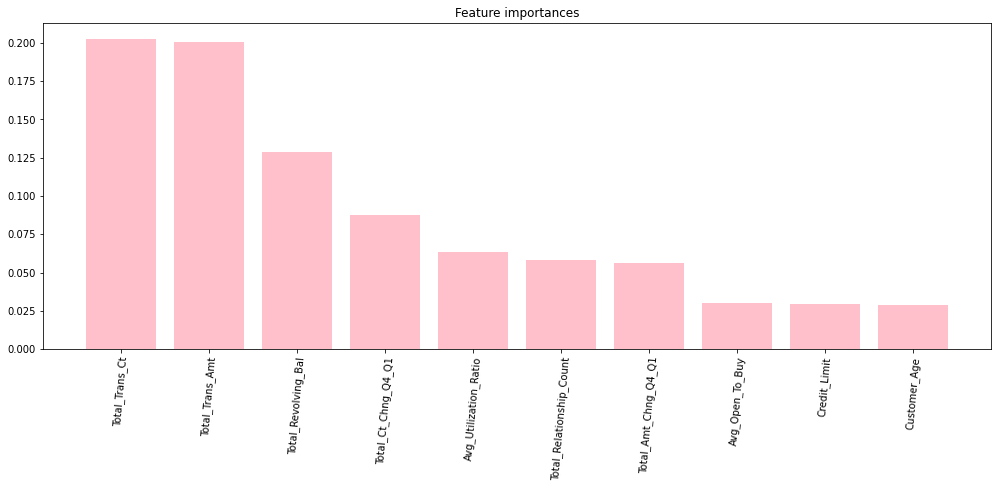

In [ ]:
# Feature Importance
feature_importances_rf = pd.DataFrame(optimal_rf_clf.feature_importances_,
                                   index = columns,
                                    columns=['importance_rf']).sort_values('importance_rf',
                                                                        ascending=False)[:10]
                                    
plt.subplots(figsize=(17,6))
plt.title("Feature importances")
plt.bar(feature_importances_rf.index, feature_importances_rf['importance_rf'],
        color="pink",  align="center")
plt.xticks(feature_importances_rf.index, rotation = 85)
#plt.xlim([-1, X.shape[1]])
plt.show()



[[4774    0]
 [   0 4774]]


[Text(0, 0.5, 'Attrited Customer'), Text(0, 1.5, 'Existing Customer')]

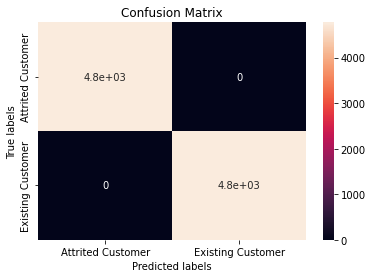

In [ ]:
# Get the confusion matrix for both train and test

labels = ['Attrited Customer', 'Existing Customer']
cm = confusion_matrix(y_train, train_class_preds123)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)



In [ ]:
# Get the predicted classes
train_class_preds = optimal_rf_clf.predict(X_train)
test_class_preds = optimal_rf_clf.predict(X_test)
y_preds_proba_rf = optimal_rf_clf.predict_proba(X_test)[::,1]
y_pred_proba = y_preds_proba_rf

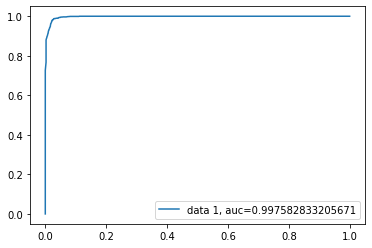

In [ ]:
#roc-auc
from sklearn import metrics
y_pred_proba = y_preds_proba_rf
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

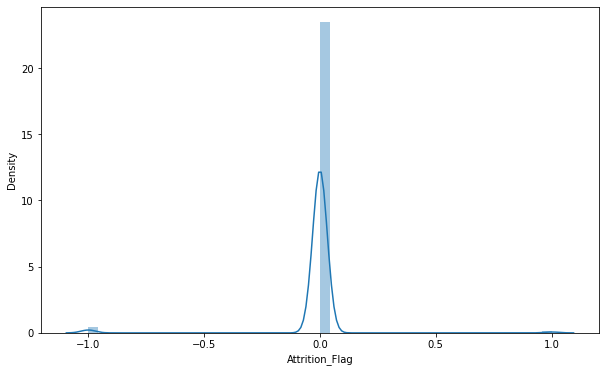

In [ ]:
# Random forest Error plot
errors_rf= y_test - test_class_preds

plt.figure(figsize = (10,6))
sns.distplot(errors_rf)
plt.show()

XGBOOST

In [ ]:
#XGBoost classifier
xgb_model = XGBClassifier().fit(X_train, y_train)

# predict
xgb_y_predict = xgb_model.predict(X_test)
xgb_y_predict_train = xgb_model.predict(X_train)


In [ ]:
#evalation metrics
test_accuracy_xb = accuracy_score(xgb_y_predict,y_test)
test_precision_score_xb = precision_score(xgb_y_predict,y_test)
test_recall_score_xb = recall_score(xgb_y_predict,y_test)
test_f1_score_xb = f1_score(xgb_y_predict,y_test)
test_roc_score_xb = roc_auc_score(xgb_y_predict,y_test)

print("The accuracy on test data is ", test_accuracy_xb)
print("The precision on test data is ", test_precision_score_xb)
print("The recall on test data is ", test_recall_score_xb)
print("The f1 on test data is ", test_f1_score_xb)
print("The roc_score on test data is ", test_roc_score_xb)

The accuracy on test data is  0.961892797319933
The precision on test data is  0.9656616415410385
The recall on test data is  0.9584372402327515
The f1 on test data is  0.9620358781810597
The roc_score on test data is  0.961919042057304


[[4606  168]
 [  95 4679]]


[Text(0, 0.5, 'Attrited Customer'), Text(0, 1.5, 'Existing Customer')]

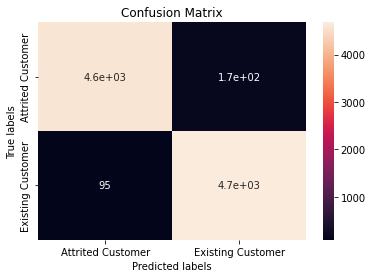

In [ ]:
# Get the confusion matrix for both train and test

labels = ['Attrited Customer', 'Existing Customer']
cm = confusion_matrix(y_train, xgb_y_predict_train)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

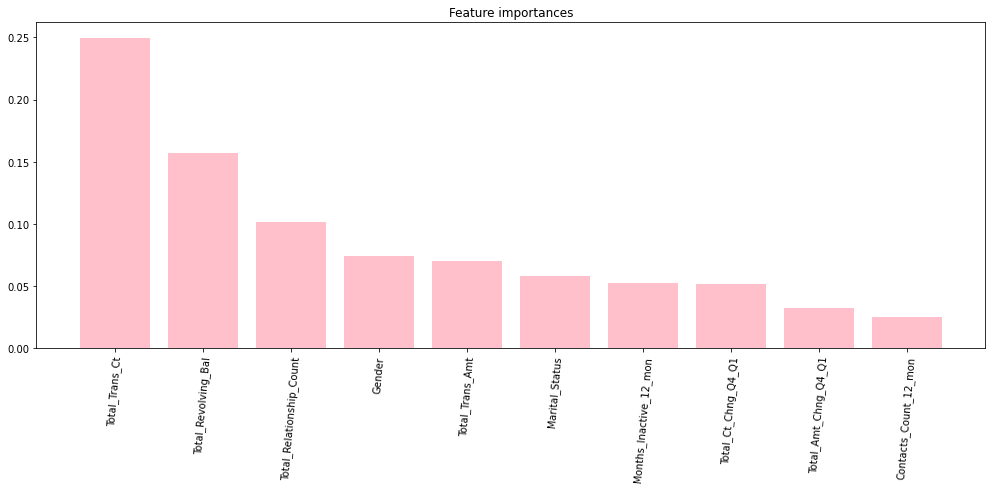

In [ ]:
#Feature Importance
feature_importances_rf = pd.DataFrame(xgb_model.feature_importances_,
                                   index = columns,
                                    columns=['importance_rf']).sort_values('importance_rf',
                                                                        ascending=False)[:10]
                                    
plt.subplots(figsize=(17,6))
plt.title("Feature importances")
plt.bar(feature_importances_rf.index, feature_importances_rf['importance_rf'],
        color="pink",  align="center")
plt.xticks(feature_importances_rf.index, rotation = 85)

plt.show()

In [ ]:
y_preds_proba_xb = xgb_model.predict_proba(X_test)[::,1]

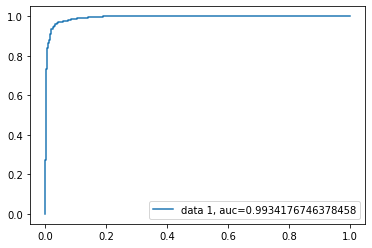

In [ ]:
#Roc-auc curve
from sklearn import metrics
y_pred_proba = y_preds_proba_xb
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

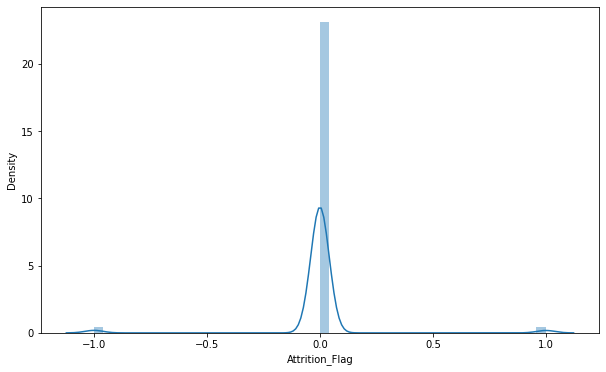

In [ ]:
# Xgboost Error plot
errors_xgb= y_test - xgb_y_predict

plt.figure(figsize = (10,6))
sns.distplot(errors_xgb)
plt.show()

In [ ]:
#evaluation metrics for all classifiers
classifiers = ['Logistic Regression','Decision Tree' ,'KNN', 'Random Forest', 'Xgboost']
test_accuracy = [test_accuracy_lr, test_accuracy_d,test_accuracy_knn, test_accuracy_rf, test_accuracy_xb]
precision_score = [test_precision_score_lr, test_precision_score_d,test_precision_score_knn, test_precision_score_rf, test_precision_score_xb]
recall_score = [test_recall_score_lr, test_recall_score_d,test_recall_score_knn, test_recall_score_rf, test_recall_score_xb]
f1_score = [test_f1_score_lr, test_f1_score_d,test_f1_score_knn, test_f1_score_rf, test_f1_score_xb]


In [ ]:
#creating dataframe for all classifiers using dictionary
pd.DataFrame({'Classifier':classifiers,'Test Accuracy': test_accuracy, 'Precision Score': precision_score, 'Recall Score':recall_score,'f1 score':f1_score})

,Classifier,Test Accuracy,Precision Score,Recall Score,f1 score
0,Logistic Regression,0.778057,0.776382,0.778992,0.777685
1,Decision Tree,0.902010,0.885260,0.915945,0.900341
2,KNN,0.920017,0.950586,0.895817,0.922389
3,Random Forest,0.778057,0.776382,0.778992,0.777685
4,Xgboost,0.961893,0.965662,0.958437,0.962036


Plotting ROC AUC for all the models

In [ ]:
classifiers_proba = [(optimized_clf, y_preds_proba_lr),
                     (attrition_classifier, y_preds_proba_d),
                     (knn_cv, y_preds_proba_knn),
               (optimal_rf_clf, y_preds_proba_rf), 
               (xgb_model, y_preds_proba_xb)]
            

# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

# Train the models and record the results
for pair in classifiers_proba:
    
    fpr, tpr, _ = roc_curve(y_test,  pair[1])
    auc = roc_auc_score(y_test, pair[1])
    
    result_table = result_table.append({'classifiers':pair[0].__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)


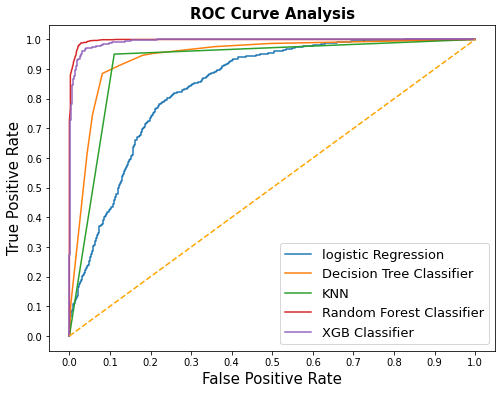

In [ ]:
#comparison all classifiers using roc-auc curve
fig = plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(["logistic Regression","Decision Tree Classifier","KNN","Random Forest Classifier","XGB Classifier"],prop={'size':13}, loc='lower right')

plt.show()

ROC curve for Random Forest and XGboost classifier are near to 1, thus both are good classifiers for this problem.